# Introdução à Visualização de Dados com Python

Qual a importância da Visualização de Dados?

<center><img src="https://i.ibb.co/MMVrRBr/Confucio.png"></center>

* Uma imagem vale mais que mil palavras (Confúcio)
* Comunicação sem se basear apenas em dados, tabelas ou narrativas

## O Quarteto de [Anscombe](https://https://pt.wikipedia.org/wiki/Quarteto_de_Anscombe)

<figure>
<center>
  <img src="https://i.ibb.co/rfcSYwd/Quarteto-Anscombe-tabela.png" alt="Quarteto-Anscombe-tabela">
  <figcaption>Grupos I, II, III e IV - Fonte: Wikipedia</figcaption>
  <br />
  <img src="https://i.ibb.co/GtTn4zr/Quarteto-Anscombe-propriedades.png" alt="Quarteto-Anscombe-propriedades" width="450">
  <figcaption>Propriedades - Fonte: Wikipedia</figcaption>
  <br />
  <img src="https://i.ibb.co/QdKhwk7/Quarteto-Anscombe-graficos.png" alt="Quarteto-Anscombe-graficos">
  <figcaption>Gráficos - Fonte: Wikipedia</figcaption>
</center>  
</figure>

## Bibliotecas de Visualização de Dados

* Matplotlib
* Seaborn
* Bokeh
* Plotly
* Plotnine

## O matplotlib

* É a principal biblioteca de visualização do Python
* Surge em 2002 quando [John Hunter](https://https://en.wikipedia.org/wiki/John_D._Hunter) e colegas conduziam pesquisas sobre epilepsia usando um software de análise de dados proprietário
* Eles migraram para o Matlab por ser mais barato e flexível
* Entretanto, o Matlab não havia sido projetado para manipular os diversos formatos e fontes de dados com os quais eles precisavam trabalhar
* John Hunter então cria a primeira versão do matplotlib, uma ferramenta de visualização para análise de eletroencefalografias e eletrocorticografias
* John faleceu em 2012 aos 44 anos por complicações em um tratamento de câncer
* [Palestra](https://youtu.be/DNRJwENqEUY) de John Hunter na SciPy Conference (2012)

## Arquitetura do matplotlib

Basicamente, a arquitetura do `matplotlib` é composta de 3 camadas:

1. ***Scripting Layer***
2. ***Artist Layer***
3. ***Backend Layer***

<center>
<img src="https://i.ibb.co/k30w6Jc/Matplotlib-layers.jpg" alt="Matplotlib-layers" width="500">
  <figcaption>Matplotlib layers - Fonte: Mastering matplotlib</figcaption>
  <br/>
<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png">
<figcaption>Fonte: realpython.com/python-matplotlib-guide/</figcaption>
</center>





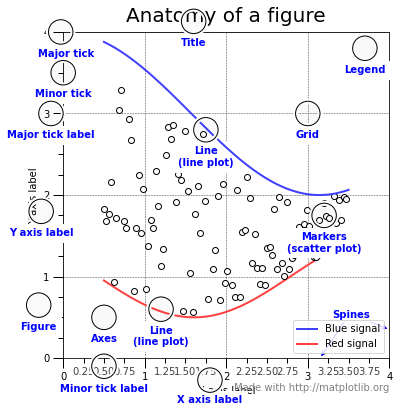

In [2]:
#@title
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()


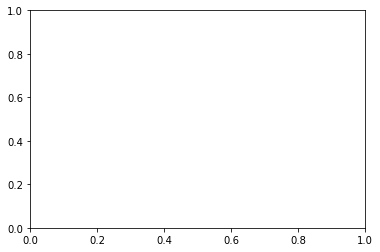

In [2]:
figura1, ax = plt.subplots()

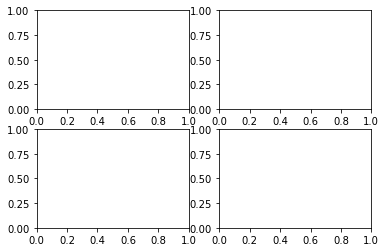

In [3]:
figura2, ax = plt.subplots(nrows=2, ncols=2)

# 1 - Importando o `matplotlib`

1a forma:
```python
import matplotlib.pyplot as plt
```
2a forma:
```python
from matplotlib import pyplot as plt
```

In [3]:
# Importando o matplotlib
import matplotlib.pyplot as plt

# 2 - Plotando os primeiros gráficos

Observação importante: esse notebook foi elaborado com base no `matplotlib` 3.4.1

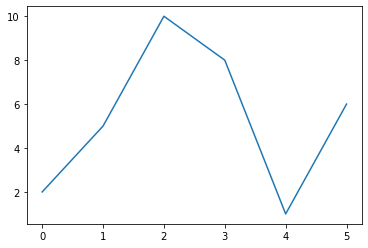

In [9]:
# Criando um gráfico de linhas
plt.plot([2, 5, 10, 8, 1, 6]); # Obs: coloque ';' ao final do comando para ocultar informações sobre o objeto criado

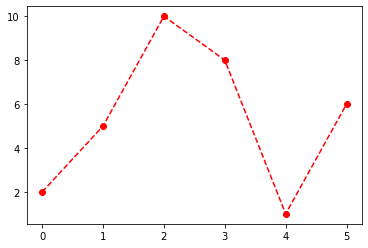

In [29]:
# Criando um gráfico de linhas, com string de formatação para cor, marcador e tipo de linha
plt.plot([2, 5, 10, 8, 1, 6], 'ro--');

### Utilizando uma string de formatação

#### <center> Tabela de cores </center> 

| Caractere | Cor            |
|-----------|----------------|
| 'b'       | blue/azul      |
| 'c'       | cyan/ciano     |
| 'g'       | green/verde    |
| 'k'       | black/preto    |
| 'm'       | magenta        |
| 'r'       | red/vermelho   |
| 'w'       | white/branco   |
| 'y'       | yellow/amarelo |

#### <center> Tipos de linhas</center>

| Caractere | Tipo de linha               |
|-----------|-----------------------------|
| '-'       | Linha cheia                 |
| '--'      | Linha tracejada             |
| '-.'      | Linha tracejada-pontilhada  |
| ':'       | Linha pontilhada            |

#### <center> Tipos de [marcadores](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) </center>

| Caractere | Marcador                      |
|-----------|-------------------------------|
| '.'       | Ponto                         |
| ','       | Pixel                         |
| 'o'       | Círculo                       |
| 'v'       | Triângulo para baixo          |
| '^'       | Triangulo para cima           |
| '<'       | Triangulo para a esquerda     |
| '>'       | Triângulo para a direita      |
| '1'       | Y para baixo                  |
| '2'       | Y para cima                   |
| '3'       | Y para a esquerda             |
| '4'       | Y para a direita              |
| 's'       | Quadrado                      |
| 'p'       | Pentágono                     |
| '\*'      | Estrela                       |
| 'h'       | Hexágono                      |
| 'H'       | Hexágono                      |
| '+'       | Mais                          |
| 'x'       | X                             |
| 'd'       | Losango estreito              |
| 'D'       | Losango                       |
| '\|'      | Linha vertical                |
| '\_'      | Linha horizontal              |

Exemplos de strings de formatação:

* 'r--' => linha vermelhada tracejada
* 'b.'  => pontos azuis
* 'ok'  => círculos pretos

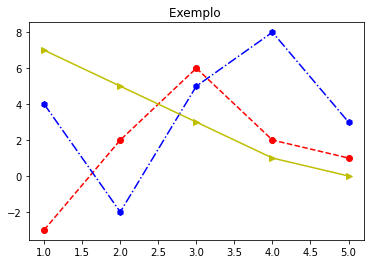

In [8]:
# Criando gráfico com 2 conjuntos de Dados
x = [1, 2, 3, 4, 5]
y1 = [-3, 2, 6, 2, 1]
y2 = [4, -2, 5, 8, 3]
y3 = [7, 5, 3, 1, 0]
plt.plot(x, y1, 'ro--', x, y2, 'bh-.');
plt.title("Exemplo ");
plt.plot(x, y3, 'y>-');

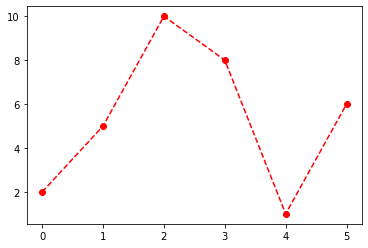

In [9]:
# Criando um gráfico de linhas
plt.plot([2, 5, 10, 8, 1, 6], 'ro--');

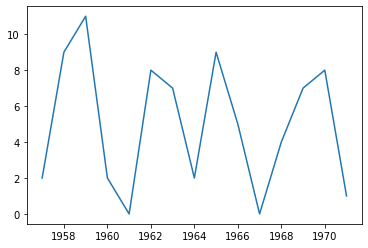

In [5]:
# Adicionando elementos ao gráfico de linhas
# Definindo o conjunto de dados - Gols do Pelé pela Seleção brasileira entre 1957 e 1971
# Dados disponíveis em https://pt.wikipedia.org/wiki/Pelé, https://pt.wikipedia.org/wiki/Diego_Maradona e https://pt.wikipedia.org/wiki/Cristiano_Ronaldo
import numpy as np
golsPeleSB = [2, 9, 11, 2, 0, 8, 7, 2, 9, 5, 0, 4, 7, 8, 1]
periodoPele = np.arange(1957, 1972)
golsMaradonaSA = [0, 0, 3, 7, 1, 2, 0, 0, 6, 7, 4, 1, 0, 1, 0, 0, 0, 2]
periodoMaradona = np.arange(1977, 1995)
golsCR7 = [0, 7, 2, 6, 5, 1, 1, 3, 7, 5, 10, 5, 3, 13, 11, 6, 14, 3]
periodoCR7 = np.arange(2003, 2021)
plt.plot(periodoPele, golsPeleSB);

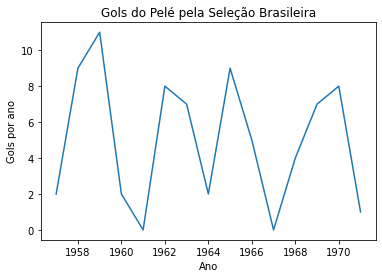

In [11]:
plt.plot(periodoPele, golsPeleSB)
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano");

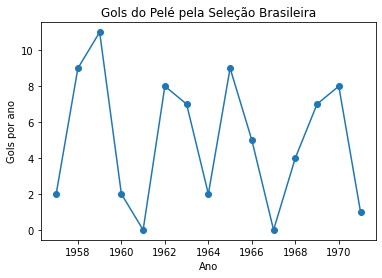

In [17]:
plt.plot(periodoPele, golsPeleSB, marker='o')
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano");

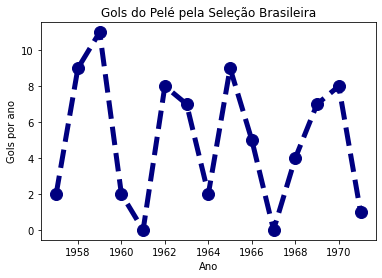

In [25]:
plt.plot(periodoPele, golsPeleSB, color='navy', marker='o', linestyle='dashed', linewidth=5, markersize=12)
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano");

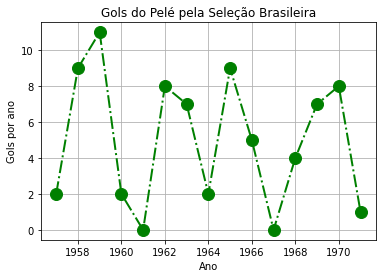

In [29]:
# Acrescentando o grid
plt.plot(periodoPele, golsPeleSB, color='green', marker='o', linestyle='dashdot', linewidth=2, markersize=12)
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano")
plt.grid(); # axis='both', 'x' ou 'y'

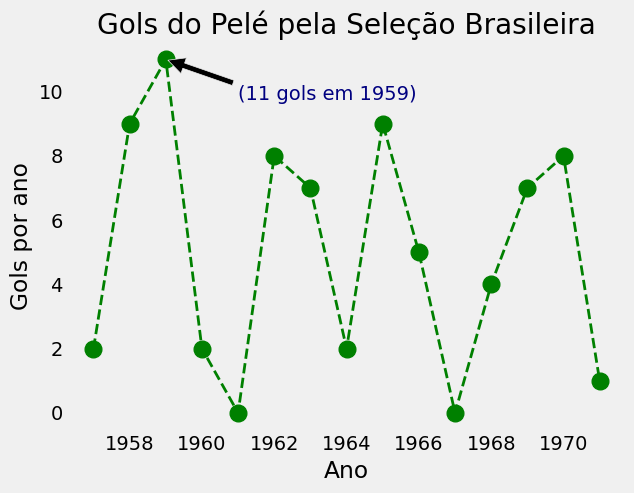

In [55]:
# Acrescentando anotação
plt.plot(periodoPele, golsPeleSB, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.annotate('(11 gols em 1959)', color = 'navy', xy=(1959, 11), xytext=(1961,9.75), arrowprops=dict(facecolor='black', shrink=0.03))
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano")
plt.grid()

In [40]:
# Listando os estilos disponíveus para uso pelo Pyplot
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


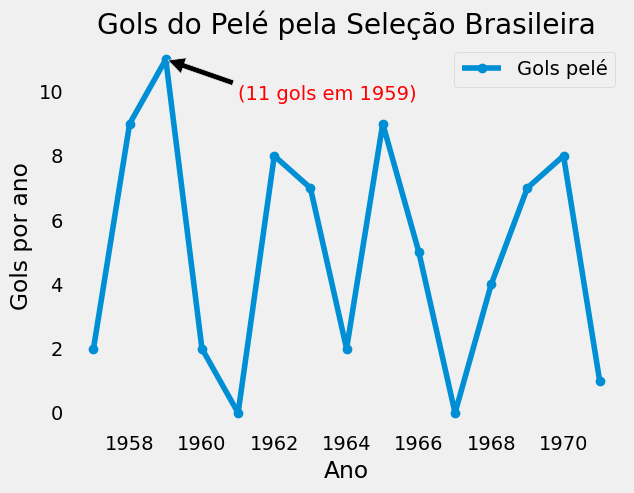

In [56]:
# Acrescentando estilo
plt.rcdefaults()
plt.style.use('fivethirtyeight')
plt.plot(periodoPele, golsPeleSB, label = "Gols pelé", marker='o')
plt.annotate('(11 gols em 1959)', color = 'red', xy=(1959, 11), xytext=(1961,9.75), arrowprops=dict(facecolor='black', shrink=0.03))
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano")
plt.grid()
plt.legend();

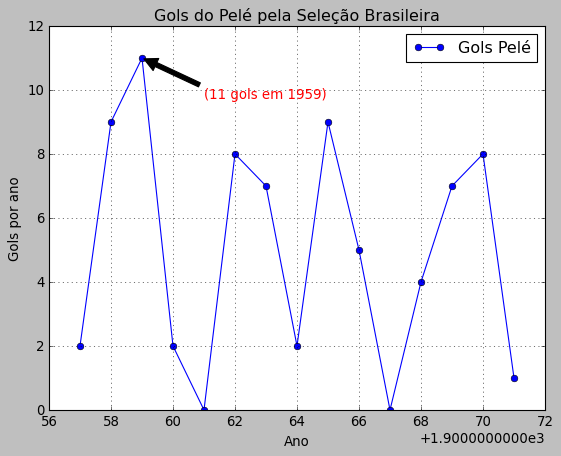

In [51]:
# Acrescentando legenda
plt.rcdefaults()
plt.style.use('classic')
plt.plot(periodoPele, golsPeleSB, label = "Gols Pelé", marker='o')
plt.annotate('(11 gols em 1959)', color = 'red', xy=(1959, 11), xytext=(1961,9.75), arrowprops=dict(facecolor='black', shrink=0.03))
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano")
plt.grid()
plt.legend(); # opções: veja https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

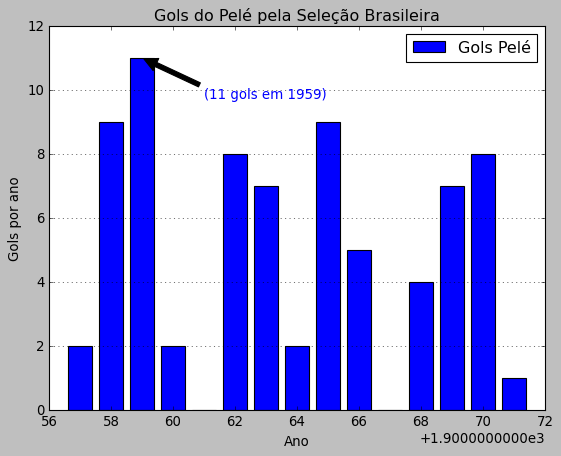

In [64]:
# Gráfico de barras
plt.rcdefaults()
plt.style.use('classic')
plt.bar(periodoPele, golsPeleSB, label = "Gols Pelé")
plt.annotate('(11 gols em 1959)', color = 'blue', xy=(1959, 11), xytext=(1961,9.75), arrowprops=dict(facecolor='black', shrink=0.03))
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano")
plt.grid(axis='y')
plt.legend();

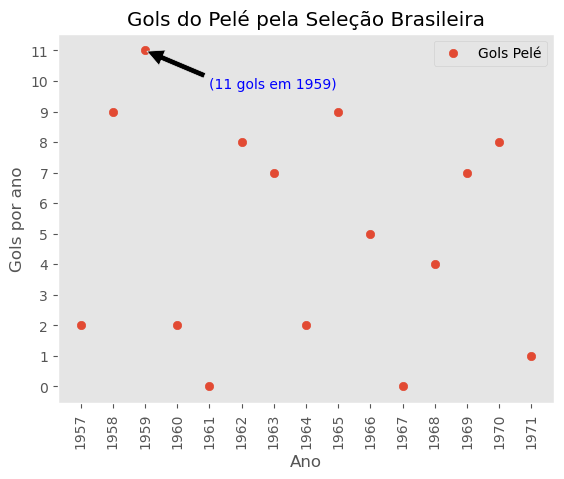

In [71]:
# Scatter plot
plt.rcdefaults()
plt.style.use('ggplot')
plt.scatter(periodoPele, golsPeleSB, label = "Gols Pelé")
plt.annotate('(11 gols em 1959)', color = 'blue', xy=(1959, 11), xytext=(1961,9.75), arrowprops=dict(facecolor='black', shrink=0.03))
plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano")
plt.grid(axis='both')
plt.legend()
plt.xticks(periodoPele, rotation = 'vertical')
plt.yticks(np.arange(0, 12));

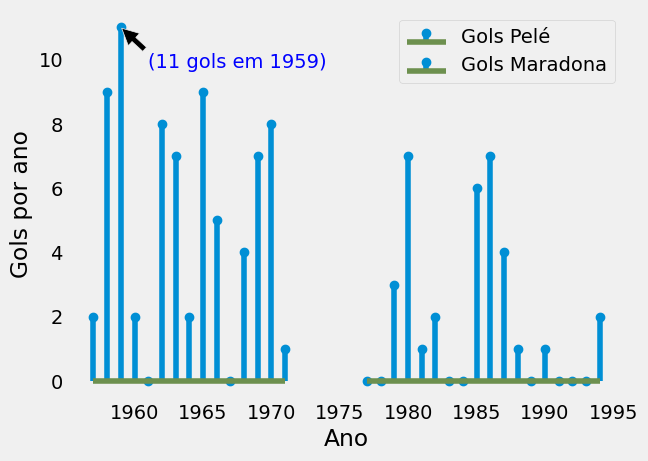

In [75]:
# Stem plot
plt.rcdefaults()
plt.style.use('fivethirtyeight')
plt.stem(periodoPele, golsPeleSB, label = "Gols Pelé")
plt.stem(periodoMaradona, golsMaradonaSA, label = "Gols Maradona")
plt.annotate('(11 gols em 1959)', color = 'blue', xy=(1959, 11), xytext=(1961,9.75), arrowprops=dict(facecolor='black', shrink=0.03))
#plt.title("Gols do Pelé pela Seleção Brasileira")
plt.ylabel("Gols por ano")
plt.xlabel("Ano")
plt.grid()
plt.legend();

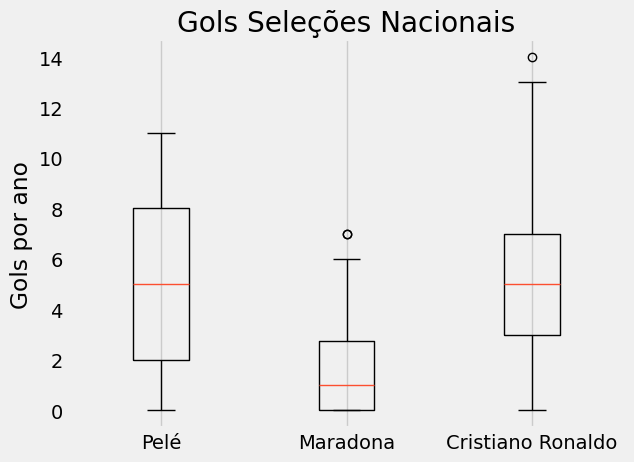

In [76]:
# Boxplot
gols = [golsPeleSB, golsMaradonaSA, golsCR7]
plt.boxplot(gols, labels=['Pelé', 'Maradona', 'Cristiano Ronaldo'])
plt.title("Gols Seleções Nacionais")
plt.ylabel("Gols por ano")
plt.grid(axis='y');

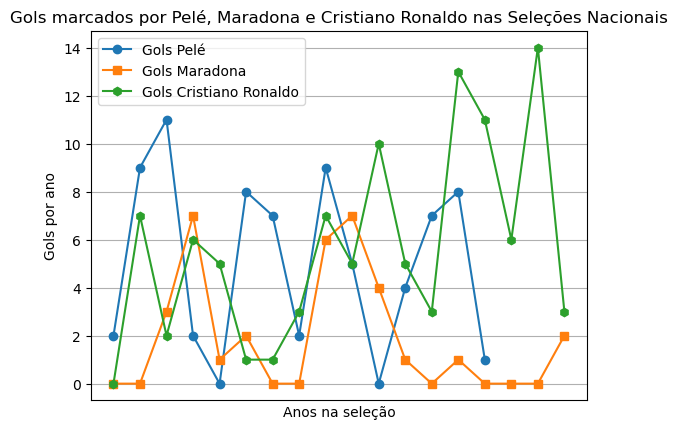

In [92]:
plt.rcdefaults()
plt.plot(golsPeleSB, label = "Gols Pelé", marker = 'o')
plt.plot(golsMaradonaSA, label = "Gols Maradona", marker = 's')
plt.plot(golsCR7, label = "Gols Cristiano Ronaldo", marker = 'h')
plt.title("Gols marcados por Pelé, Maradona e Cristiano Ronaldo nas Seleções Nacionais")
plt.ylabel("Gols por ano")
plt.xlabel("Anos na seleção")
plt.xticks([]) # Desalibita ticks do eixo x
plt.grid()
plt.legend();


# Utilizando subplots

### Exemplo de GRID

<img src="https://i.ibb.co/0XSrMTL/Grid4x2b.png">

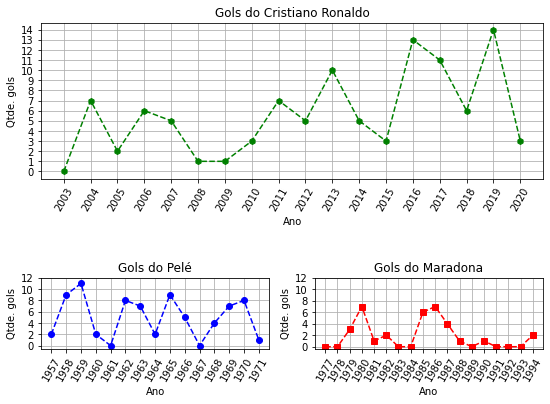

In [6]:
gridsize = (4, 2)
fig = plt.figure(figsize=(9, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # Cristiano Ronaldo
ax2 = plt.subplot2grid(gridsize, (3, 0)) # Pelé
ax3 = plt.subplot2grid(gridsize, (3, 1)) # Maradona

ax1.set_title('Gols do Cristiano Ronaldo')
ax1.plot(periodoCR7, golsCR7, 'gh--')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Qtde. gols')
ax1.set_xticks(periodoCR7)
ax1.set_yticks(np.arange(0, 15))
ax1.set_xticklabels(periodoCR7, rotation=60)
ax1.grid()

ax2.set_title('Gols do Pelé')
ax2.plot(periodoPele, golsPeleSB, 'bo--')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Qtde. gols')
ax2.set_yticks(np.arange(0, 13, 2))
ax2.set_xticks(periodoPele)
ax2.set_xticklabels(periodoPele, rotation=60)
ax2.grid()

ax3.set_title('Gols do Maradona')
ax3.plot(periodoMaradona, golsMaradonaSA, 'rs--')
ax3.set_xlabel('Ano')
ax3.set_ylabel('Qtde. gols')
ax3.set_yticks(np.arange(0, 13, 2))
ax3.set_xticks(periodoMaradona)
ax3.set_xticklabels(periodoMaradona, rotation=60)
ax3.grid()

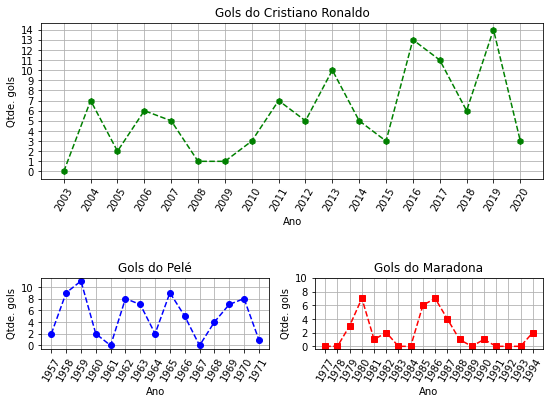

In [7]:
#import matplotlib.gridspec as gridspec
fig2 = plt.figure(figsize=(9, 6))
spec2= fig2.add_gridspec(nrows=4, ncols=2)

ax1 = fig2.add_subplot(spec2[0:2, 0:2]) # Cristiano Ronaldo
ax2 = fig2.add_subplot(spec2[3, 0]) # Pelé
ax3 = fig2.add_subplot(spec2[3, 1]) # Maradona

ax1.set_title('Gols do Cristiano Ronaldo')
ax1.plot(periodoCR7, golsCR7, 'gh--')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Qtde. gols')
ax1.set_xticks(periodoCR7)
ax1.set_yticks(np.arange(0, 15))
ax1.set_xticklabels(periodoCR7, rotation=60)
ax1.grid()

ax2.set_title('Gols do Pelé')
ax2.plot(periodoPele, golsPeleSB, 'bo--')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Qtde. gols')
ax2.set_yticks(np.arange(0, 11, 2))
ax2.set_xticks(periodoPele)
ax2.set_xticklabels(periodoPele, rotation=60)
ax2.grid()

ax3.set_title('Gols do Maradona')
ax3.plot(periodoMaradona, golsMaradonaSA, 'rs--')
ax3.set_xlabel('Ano')
ax3.set_ylabel('Qtde. gols')
ax3.set_yticks(np.arange(0, 11, 2))
ax3.set_xticks(periodoMaradona)
ax3.set_xticklabels(periodoMaradona, rotation=60)
ax3.grid()

### Tabelas interessantes

* Tabela de [cores](https://matplotlib.org/stable/gallery/color/named_colors.html) - [Como especificar cores](https://matplotlib.org/stable/tutorials/colors/colors.html)
* Tipos de [linhas](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
* Tipos de [marcadores](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

# Dicas de materiais para consulta

* matplotlib [cheatsheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets.pdf)
* [Artigo](https://www.aosabook.org/en/matplotlib.html) de John Hunter e Michael Droettboom
* Documentação do [matplotlib](https://matplotlib.org/)
   - Pyplot 
      - [Funções](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
      - [Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) 
      - [Exemplos](https://matplotlib.org/stable/gallery/index.html#pyplots-examples)
      
* [Python plotting with matplotlib](https://realpython.com/python-matplotlib-guide/) (Real Python)
* [From Data to Viz](https://www.data-to-viz.com/)
* Livros
   - [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/) (Claus O. Wilke)
   - [Mastering matplotlib](https://learning.oreilly.com/library/view/mastering-matplotlib/9781783987542/) (Duncan M. McGreggor)
* Tabelas interessantes
   - Tabela de [cores](https://matplotlib.org/stable/gallery/color/named_colors.html) - [Como especificar cores](https://matplotlib.org/stable/tutorials/colors/colors.html)
   - Tipos de [linhas](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
   - Tipos de [marcadores](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)